# Changing Colorspaces

There are more than 150 color-space conversion methods available in OpenCV. We will look into BGR and HSV. For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.

BGR -> Gray: flag=cv2.COLOR_BGR2GRAY

BGR -> HSV: flag=cv2.COLOR_BGR2HSV

For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

To get other flags, just run following commands in your Python terminal :

In [1]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
#print (flags)

# Image Thresholding - cv2.threshold

Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold.

First argument is the source image, which should be a grayscale image.

Second argument is the threshold value which is used to classify the pixel values.

Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 

Forth argument is treshols style, there are 5 of them:

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.rcParams["figure.figsize"] = (20,13)
plt.style.use('dark_background')
plt.show()

<Figure size 640x480 with 6 Axes>

# Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

# Geometric Transformations of Images

## Transformation
OpenCV has 2 transformation functions:

v2.warpAffine - takes a 2x3 transformation matrix

cv2.warpPerspective - takes a 3x3 transformation matrix


## Scaling
cv2.resize()

Interpolation methods are:

cv2.INTER_AREA - for shrinking
cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR (faster) - for zooming.

By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes.

In [3]:
img = cv2.imread('messi5.jpg')
img_resized = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

# OR 

height, width = img.shape[:2]
img_resized = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

## Translation - shifting the location

Translation is the shifting of object’s location. If you know the shift in (x, y) direction, let it be ($t_x$, $t_y$), you can create the transformation matrix $M$ as follows:

$M$ = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}


In [4]:
import cv2
import numpy as np

img = cv2.imread('messi5.jpg',0)
rows, cols = img.shape

# create transformation matrix, where 100 & 50 - image shift of (100, 50)
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('img', dst)
cv2.waitKey(4000)
cv2.destroyAllWindows()

# cv2.warpAffine?

## Rotation

Rotation of an image for an angle $theta$ is achieved by the transformation matrix of the form

M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}

where:

\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}

To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D.

Check below example which rotates the image by 90 degree with respect to center without any scaling.

In [5]:
img = cv2.imread('messi5.jpg', 1)
rows, cols = img.shape[:2] # [:2] because there are 3d value - subarray of colors, which we don`t need

M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1) # cols/2, rows/2 - center of the image
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('img', dst)
cv2.waitKey(4000)
cv2.destroyAllWindows()

# cv2.getRotationMatrix2D?
# cv2.warpAffine?

# Affine Transformation - cv2.warpAffine

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

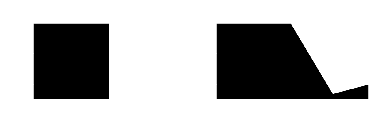

In [19]:
img = cv2.imread('drawing_1.png',)
rows, cols = img.shape[:2] 

pts1 = np.float32([[50,50],[200,50],[50,200]]) # 3 points in original image
pts2 = np.float32([[10,100],[200,50],[100,250]]) # same 3 points in the transformed image

M = cv2.getAffineTransform(pts1, pts2) # calculate transformation matrix from this points positions before-after
# cv2.getAffineTransform?

dst = cv2.warpAffine(img, M, (cols, rows)) # transform. (cols, rows) - size of the output image, here - same as input
# cv2.warpAffine?

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Perspective Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

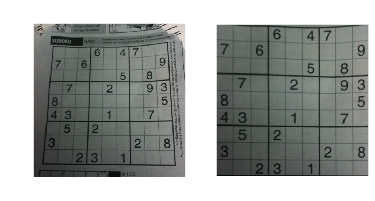

In [27]:
img = cv2.imread('sudokusmall.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[56, 65], [368, 52], [28, 387],[ 389, 390]])
pts2 = np.float32([[0, 0], [300, 0],[ 0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (300, 300))

plt.subplot(121) ,plt.imshow(img) ,plt.title('Input')
plt.subplot(122) ,plt.imshow(dst) ,plt.title('Output')
plt.show()